In [1]:
from pandas import *
import numpy as np

In [2]:
df=read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='Category'>

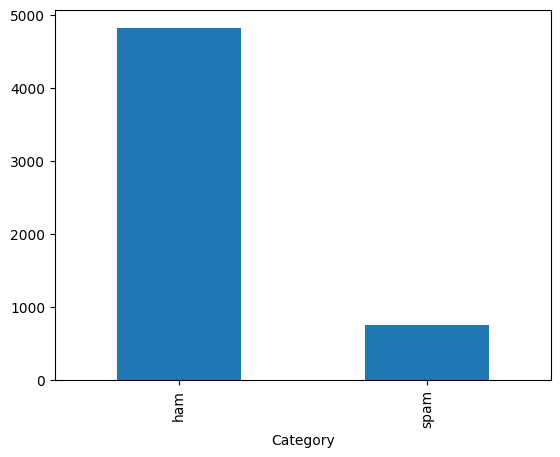

In [3]:
df.Category.value_counts().plot(kind='bar')

In [9]:
# so we are having imbalance dataset where  spam emails are less

In [4]:
# convert Caregory column into numeric representation
df['spam']=df.Category.apply(lambda x: 1 if x=='spam' else 0)

In [5]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [13]:
df.shape

(5572, 3)

In [38]:
corpus=" ".join(df.Message.values)

In [39]:
len(corpus)

453387

In [6]:
# preprocessing text using spacy and regular expressions

In [7]:
import re
import spacy
nlp=spacy.load("en_core_web_sm")

In [8]:
def preprocess_text_using_re(text):
    # removing unnecessary punchuations and escape sequence chars
    text=re.sub("[!?'\"<>;,#\\\/^~*]","",text)
    text=text.strip()
    return text
    

In [9]:
df['message_re_preprocced']=df.Message.apply(preprocess_text_using_re)

In [10]:
df.drop('Category',axis=1,inplace=True)

In [11]:
df.head()

,Message,spam,message_re_preprocced
0,"Go until jurong point, crazy.. Available only ...",0,Go until jurong point crazy.. Available only i...
1,Ok lar... Joking wif u oni...,0,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...,0,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro...",0,Nah I dont think he goes to usf he lives aroun...


In [12]:
from random import randint

In [14]:
num=randint(0,5570)
df.Message[num],df.message_re_preprocced[num]

('Like a personal sized or what', 'Like a personal sized or what')

In [15]:
def lemmatize(text):
    doc=nlp(text)
    text=" ".join([token.lemma_ for token in doc ])
    return text

In [16]:
df['lemma_preprocessed']=df.message_re_preprocced.apply(lemmatize)

In [17]:
df.head()

,Message,spam,message_re_preprocced,lemma_preprocessed
0,"Go until jurong point, crazy.. Available only ...",0,Go until jurong point crazy.. Available only i...,go until jurong point crazy .. available only ...
1,Ok lar... Joking wif u oni...,0,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...,0,U dun say so early hor... U c already then say...,u dun say so early hor ... u c already then sa...
4,"Nah I don't think he goes to usf, he lives aro...",0,Nah I dont think he goes to usf he lives aroun...,nah I do nt think he go to usf he live around ...


In [25]:
num=randint(0,5570)
df.message_re_preprocced[num],df.lemma_preprocessed[num]

('Customer service annoncement. You have a New Years delivery waiting for you. Please call 07046744435 now to arrange delivery',
 'customer service annoncement . you have a New Years delivery wait for you . please call 07046744435 now to arrange delivery')

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
vectorizer=CountVectorizer()

In [28]:
df.drop(columns=['Message','message_re_preprocced'],inplace=True)

In [29]:
df.head()

,spam,lemma_preprocessed
0,0,go until jurong point crazy .. available only ...
1,0,ok lar ... joke wif u oni ...
2,1,free entry in 2 a wkly comp to win FA Cup fina...
3,0,u dun say so early hor ... u c already then sa...
4,0,nah I do nt think he go to usf he live around ...


In [31]:
x=vectorizer.fit_transform(df.lemma_preprocessed.values)

In [32]:
np.where(x.toarray()[0]!=0)

(array([1111, 1325, 1733, 1735, 2007, 2249, 3312, 3355, 3439, 3853, 4113,
        4224, 5209, 5552, 7073, 7441, 7655, 7856], dtype=int64),)

In [33]:
x.shape

(5572, 8026)

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
 X_train, X_test, y_train, y_test=train_test_split(x,df.spam,test_size=0.2,stratify=df.spam)

In [37]:
X_train.shape,y_train.shape

((4457, 8026), (4457,))

In [38]:
X_test.shape

(1115, 8026)

In [40]:
X_test[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
model=MultinomialNB()

In [43]:
model.fit(X_train,y_train)

MultinomialNB()

In [44]:
model.score(X_test,y_test)

0.9847533632286996

In [45]:
from seaborn import heatmap
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
y_predicted=model.predict(X_test)

In [49]:
a=np.array(np.where(y_predicted!=0))

In [51]:
y_predicted[a]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1]], dtype=int64)

In [55]:
y_test.values[a]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1]], dtype=int64)

In [56]:
cm=confusion_matrix(y_test.values,y_predicted)

In [57]:
cm

array([[954,  12],
       [  5, 144]], dtype=int64)

<Axes: >

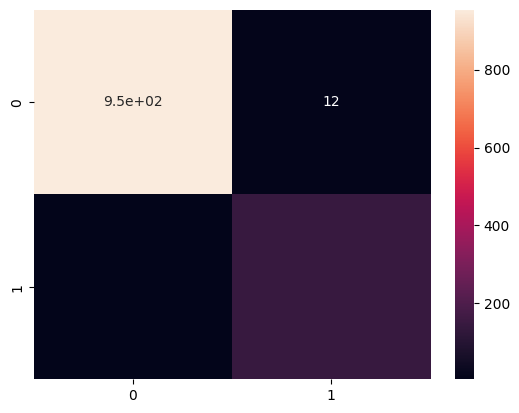

In [58]:
heatmap(cm,annot=True)


In [59]:
print(classification_report(y_test.values,y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.92      0.97      0.94       149

    accuracy                           0.98      1115
   macro avg       0.96      0.98      0.97      1115
weighted avg       0.99      0.98      0.98      1115



In [60]:
# creating function to process an incoming text

In [77]:
def classify(text):
    text=preprocess_text_using_re(text)
    text=lemmatize(text)
    vector=vectorizer.transform([text])
    return 'spam' if model.predict(vector)[0]==1 else 'not spam'
    

In [69]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

In [79]:
classify('Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!')

'spam'

In [80]:
classify('Hey mohan, can we get together to watch footbal game tomorrow?')

'not spam'

In [81]:
import pickle

In [82]:
pickle.dump(vectorizer,open('spam_vectorizer.pkl','wb'))

In [83]:
pickle.dump(model,open('spam_model.pkl','wb'))